# Workshop: Regression in Culinary Cuisine Classification

### Scenario:
You have been hired as a data scientist by a renowned culinary institute that offers diverse cooking courses. As part of a new project, the institute aims to develop an automated system capable of predicting the type of cuisine based on the list of ingredients used in various dishes. This predictive model will help culinary enthusiasts and aspiring chefs identify the characteristics of different cuisines and experiment with new recipes. Your task is to guide the institute through the process of building and evaluating this predictive model using regression techniques.

### Objective:
You will guide the culinary institute in preparing and refining a dataset of dishes and their ingredients, effectively addressing class imbalance using SMOTE. You'll then demonstrate the application of logistic regression to classify cuisine types, empowering the institute to predict cuisines accurately for new recipes and fostering culinary exploration among enthusiasts and future chefs.

### Input Dataset: cuisines.csv
The input dataset is a collection of unnamed recipes from around the world.
- Each row represents a dish or an unnamed recipe.
- The columns contain a series of ingredients with a binary input (1 or 0) to indicate whether the ingredient is used in the recipe. [1 = Yes; 0 = No]
- There is a column called cuisine which classifies the unnamed recipe to the type of cuisine.

### Directions:
1. Import the required libraries for data preparation and visualization.<br>
    * Import pandas for DataFrame operations.<br>
    * Import matplotlib.pyplot for visualization.<br>
    * Import numpy for array operations.<br>
3. Read the input dataset and use visualizations to understand the data.<br>
    * Read the cuisines.csv file and save it into a DataFrame.<br>
    * Plot a graph to understand how many unique cuisines are listed in the data.<br>
    * Create a separate DataFrame for each type of cuisine.<br>
4. Create a function create_ingredient_df() to analyze the ingredients used in each type of cuisine.<br>
    * Drop the known common columns in the cuisine DataFrames.<br>
    * Drop any ingredient that isn’t used in the recipe. [Hint: drop if ingredient = 0]<br>
    * Call the function to check  and plot the 10 most common ingredients in each type of cuisine.<br>
5. Prepare the data for classification.<br>
    * Drop all common ingredients from the dataset.<br>
    * Import the necessary libraries to use SMOTE.<br>
    * Use SMOTE to transform the features of the dataset.<br>
    * Verify whether the data has been balanced.<br>
6. Train a logistic regression model.<br>
    * Import the necessary libraries to build and evaluate a logistic regression model. <br>
    * Split the dataset into a training and testing set.<br>
    * Fit the model on the training dataset.<br>
    * Test the accuracy on the testing dataset.<br>
7. Make predictions with the model and evaluate the results.<br>
    * Select a random ingredient from the test dataset and record its corresponding cuisine type.<br>
    * Input the selected ingredient into the regression model and predict the type of cuisine.<br>
    * Use the classification_report() function to evaluate the results.<br>


## Import the Required Libraries and Read the Dataset

- Let's start by importing the required libraries, such as Pandas, Matplotlib.pyplot, and Numpy.


In [1]:
# Import the necessary libraries.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

- From the local drive, upload and read the __cuisines__ dataset.

In [2]:
# Read the cuisines.csv file and save it in the DataFrame named, df.
df = pd.read_csv("cuisines.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)

- The head() function gives the first five rows of the data.

In [3]:
# Perform an EDA to understand the data.
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Let's see the data types using the info() method.

In [4]:
# Perform an EDA to understand the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


**Observations:**

- __[TODO]__ Record your observations here.

## Visualize Cuisine Distribution and Create Cuisine-Specific DataFrames

- Plot the distribution of cuisines. Use the bar graph to plot the value counts of different cuisines.


<AxesSubplot: >

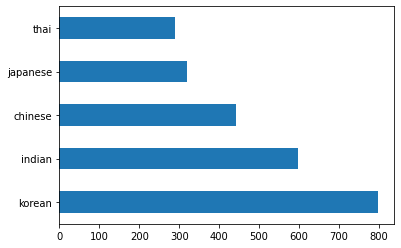

In [5]:
df.cuisine.value_counts().plot.barh()

- Create a DataFrame for each cuisine
- Print the shape of each DataFrame to get the number of rows and columns in each DataFrame

In [6]:
df_cuisine = df.groupby(df["cuisine"]).sum()
#Create a DataFrame for each type of cuisine.
df_chinese = df_cuisine[df_cuisine.index == "chinese"]
df_japanese = df_cuisine[df_cuisine.index == "japanese"]
df_thai = df_cuisine[df_cuisine.index == "thai"]
df_korean = df_cuisine[df_cuisine.index == "korean"]
df_indian = df_cuisine[df_cuisine.index == "indian"]
# Print the shape of each DataFrame to understand their dimensions.
print(df_chinese.shape)
print(df_japanese.shape)
print(df_thai.shape)
print(df_korean.shape)
print(df_indian.shape)

(1, 383)
(1, 383)
(1, 383)
(1, 383)
(1, 383)


## Create a Function to Analyze Ingredient Usage

- Define a function to create an ingredient DataFrame
- Create a function, create_ingredient(), in Python to create an ingredient DataFrame
- This function will remove an unnecessary column and count the ingredients.

In [7]:
def create_ingredient_df(df):
    for col in df.columns:
        if (df[col] == 0).any():
            df = df.drop(columns=[col])

#     ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
#     inplace=False)
#     return ingredient_df
    return df


- Check and plot the top 10 ingredients for each cuisine

<AxesSubplot: >

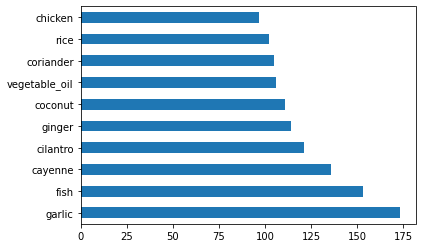

In [8]:
# Call create_ingredient_df for thai cuisine and save in thai_ingredient_df.
thai_ingredient_df =  create_ingredient_df(df_thai)
# Plot a horizontal bar graph (as shown above) for the top 10 ingredients.
thai_ingredient_df.sum().nlargest(10).plot.barh()

<AxesSubplot: >

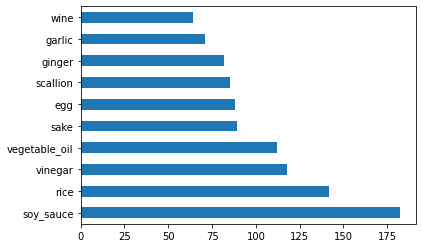

In [9]:
# Call create_ingredient_df for japanese cuisine and save in japanese_ingredient_df.
japanese_ingredient_df =  create_ingredient_df(df_japanese)
# Plot a horizontal bar graph (as shown above) for the top 10 ingredients.
japanese_ingredient_df.sum().nlargest(10).plot.barh()

<AxesSubplot: >

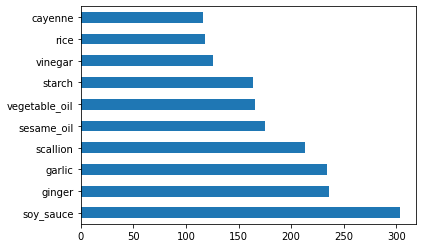

In [10]:
# Call create_ingredient_df for chinese cuisine and save in chinese_ingredient_df.
chinese_ingredient_df =  create_ingredient_df(df_chinese)
# Plot a horizontal bar graph (as shown above) for the top 10 ingredients.
chinese_ingredient_df.sum().nlargest(10).plot.barh()

<AxesSubplot: >

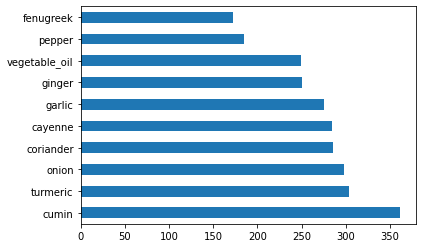

In [11]:
# Call create_ingredient_df for indian cuisine and save in indian_ingredient_df.
indian_ingredient_df =  create_ingredient_df(df_indian)
# Plot a horizontal bar graph (as shown above) for the top 10 ingredients.
indian_ingredient_df.sum().nlargest(10).plot.barh()

<AxesSubplot: >

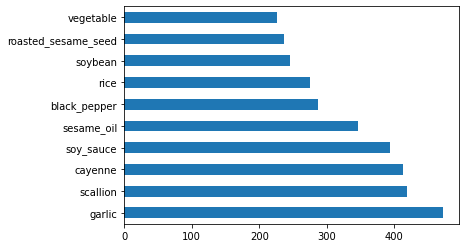

In [12]:
# Call create_ingredient_df for korean cuisine and save in korean_ingredient_df.
korean_ingredient_df =  create_ingredient_df(df_korean)
# Plot a horizontal bar graph (as shown above) for the top 10 ingredients.
korean_ingredient_df.sum().nlargest(10).plot.barh()

**Observations:**

- __[TODO]__ Record your observations here.

In [13]:
# Drop the common ingredients and other unneccesary columns from 'df' and save in feature_df.
labels_df = df.cuisine
feature_df = df.drop(["cuisine"], axis=1)
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Observations:**

- __[TODO]__ Record your observations here.

## Prepare the Data for Classification


- Import and use oversampling from SMOTE
- Once imported, transform the same using the features and labels df.


In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

- Check out the new value counts for each cuisine
- Compare the new counts with the old counts

In [15]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


**Observations:**

- __[TODO]__ Record your observations here.

## Train a Logistic Regression Model

- Import the libraries for logistic regression model



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

- Split the data into training and testing sets in the ratio 70:30

In [17]:
X_train, X_test, y_train, y_test = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.3)

- Train the logistic regression model and calculate the accuracy.
- The model **lr** is fitted to the variable model.
- Next, accuracy needs to be calculated using the method model.

In [18]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7889908256880734


**Observations:**

- __[TODO]__ Record your observations here.


## Make Predictions and Analyze the Results

- Now, let's make a prediction for a specific test instance.
- Let's calculate and print the probabilities for each class.
- Display the top predicted cuisines


In [34]:
X_test.iloc[50]!=0

almond        False
angelica      False
anise         False
anise_seed    False
apple         False
              ...  
wood          False
yam           False
yeast         False
yogurt        False
zucchini      False
Name: 78, Length: 383, dtype: bool

In [19]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['bell_pepper', 'cilantro', 'garlic', 'lemon_juice', 'olive_oil',
       'onion', 'tomato', 'turmeric'],
      dtype='object')
cuisine: indian


**Observations:**

- __[TODO]__ Record your observations here.

Note: The train and test datasets are selected randomly from the input dataset, so the code will give slightly different results every time you run the train_test_split function.

Now, predict the cuisine type using the model.
- Since we want the probability, we can use the predict_proba method.
- Store the value in the resultdf DataFrame.
- Finally, sort the values by index values.





In [38]:
X_test.iloc[50].values.reshape(-1, 1).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [35]:
test= X_test.iloc[50].values.reshape(-1, 1).T
# Use the predict_proba() method and pass the test variable as an input parameter. Save the result in proba.
proba = model.predict_proba(test)
# Save the model.classes_ output in a variable named classes.
classes = model.classes_
# Save the prediction output as a DataFrame  using the pd.DataFrame() method. Input proba as the data parameter and classes as the columns parameter. Save the result in resultdf.
resultdf = pd.DataFrame(proba, columns = classes)
resultdf
topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

,0
indian,0.953588
thai,0.030130
japanese,0.009915
chinese,0.006019
korean,0.000348


**Observations:**

- __[TODO]__ Record your observations here.

## Evaluate the Model

- Generate a classification report to evaluate the model's performance
- Now, let's check the classification report using the method classification_report.


In [31]:
y_pred = model.predict(X_test)
# Print the result of the function classfication_report(). Use y_test and y_pred to evaluate the model's performance.
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n     chinese       0.74      0.66      0.70       244\n      indian       0.88      0.89      0.88       241\n    japanese       0.73      0.73      0.73       243\n      korean       0.82      0.79      0.81       247\n        thai       0.77      0.88      0.82       224\n\n    accuracy                           0.79      1199\n   macro avg       0.79      0.79      0.79      1199\nweighted avg       0.79      0.79      0.79      1199\n'

**Observations:**

- __[TODO]__ Record your observations here.